In [16]:
import pandas as pd
import matplotlib.pyplot as plt

From: https://www.agro.uba.ar/users/sala/pdfs/063-oecol96c.pdf

Jackson, R. B., Canadell, J., Ehleringer, J. R., Mooney, H. A., Sala, O. E., & Schulze, E. D. (1996). A global analysis of root distributions for terrestrial biomes. Oecologia, 108(3), 389-411.

#### Equation 1:  $ Y =  1- \beta ^d $

Y is root density, d is depth, $\beta$ is empiricaal parameter

#### From table 1
grasses: $\beta$ = 0.952
trees: $\beta$ = 0.970
shrubs: $\beta$ = 0.978
...

In [17]:
depths = [2.,4., 8., 20., 40., ]
dcm = [2.54*x for x in depths]

In [18]:
df = pd.read_csv("../data/final_data.csv")

In [19]:
# Numeric NLCD vals to class labels
nlcd= {0: "Open water",
1 : "Perennial ice/snow",
2 : "Developed",
3 : "Developed, low intensity",
4 : "Developed, medium intensity",
5 : "Developed high intensity",
6 : "Barren land (rock/sand/clay)",
7 : "Deciduous forest", 
8 : "Evergreen forest",
9 : "Mixed forest",
10 : "Dwarf scrub",
11 : "Shrub/scrub",
12 : "Grassland/herbaceous",
13 : "Sedge/herbaceous",
14 : "Lichens",
15 : "Moss",
16 : "Pasture/hay",
17 : "Cultivated crops",
18 : "Woody wetlands",
19 : "Emergent herbaceous wetlands"}


In [20]:
# Match the betas for each nlcd landcover type: 

for i in df.lc_type.unique():
    print(i)
    print(nlcd[i])
    print("==="*25)

11.0
Shrub/scrub
12.0
Grassland/herbaceous
6.0
Barren land (rock/sand/clay)
8.0
Evergreen forest
17.0
Cultivated crops
7.0
Deciduous forest
16.0
Pasture/hay


In [21]:
beta_dict = {
            'grass': 0.952,
            'trees': 0.970,
            'shrub': 0.978,
            'crops': 0.961,
            'barren': 0.914
            }

In [22]:
def calc_y(depth,lctype):
    B = beta_dict[lctype]
    y = 1-B**depth
    return y

In [23]:
grass = [calc_y(x,"grass") for x in dcm]
trees = [calc_y(x,"trees") for x in dcm]
shrubs = [calc_y(x,"shrub") for x in dcm]
crops = [calc_y(x,"crops") for x in dcm]
tundra = [calc_y(x,"barren") for x in dcm]


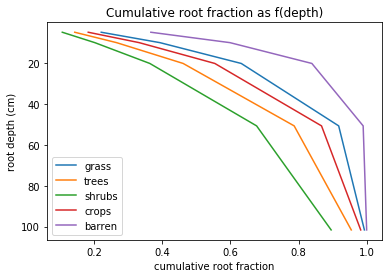

In [24]:
plt.title("Cumulative root fraction as f(depth)")
plt.plot(grass, dcm, label = "grass")
plt.plot(trees, dcm, label = "trees")
plt.plot(shrubs, dcm, label = "shrubs")
plt.plot(crops, dcm, label = "crops")
plt.plot(tundra, dcm, label = "barren")

plt.gca().invert_yaxis()
plt.ylabel("root depth (cm)")
plt.xlabel("cumulative root fraction")
plt.legend()
